Regressão usando Scikit Learn

In [1]:
#pip install sklearn seaborn

In [2]:
# importando as bibliotecas
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#configurando pandas para mostrar linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#configurando pandas para não mostrar notação cientifica 
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [4]:
# ler os dados
df_seguro = pd.read_csv('insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [5]:
#quantidade de linhas e colunas
df_seguro.shape

(1338, 7)

In [6]:
#avaliando os tipos
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#informações
#estamos diante de uma variável continua 
#então é um problema de regreção
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#conhecer as medidas estatisticas, dispersão, separatris, distribuição
#qual dristribuição da idade
#bmi indice de massa corporal?
#e a variável target?
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<AxesSubplot:xlabel='age', ylabel='Count'>

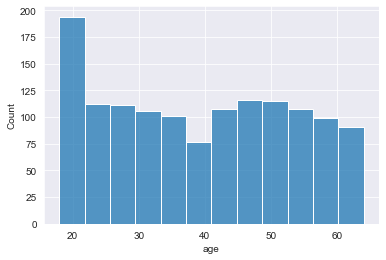

In [9]:
#analisando a distribuição das idades que é age
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='age')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

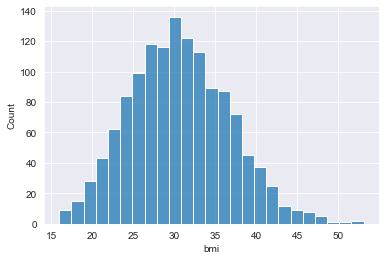

In [10]:
#distribuição do bmi que é indice de massa corporal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')

<AxesSubplot:xlabel='children', ylabel='count'>

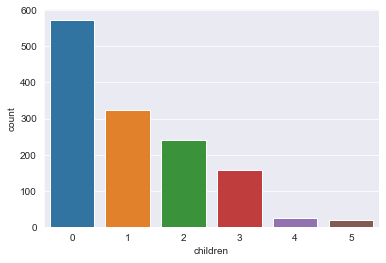

In [11]:
#quantidade de crianças que é children, que cada um tem.
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children')

<AxesSubplot:xlabel='charges', ylabel='Count'>

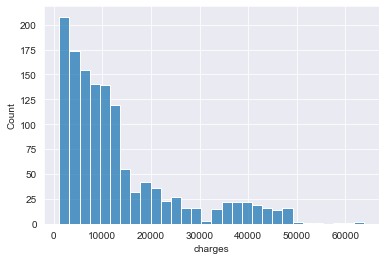

In [12]:
# analizando a variável target valor=charges do seguro
sns.histplot(data=df_seguro['charges'])

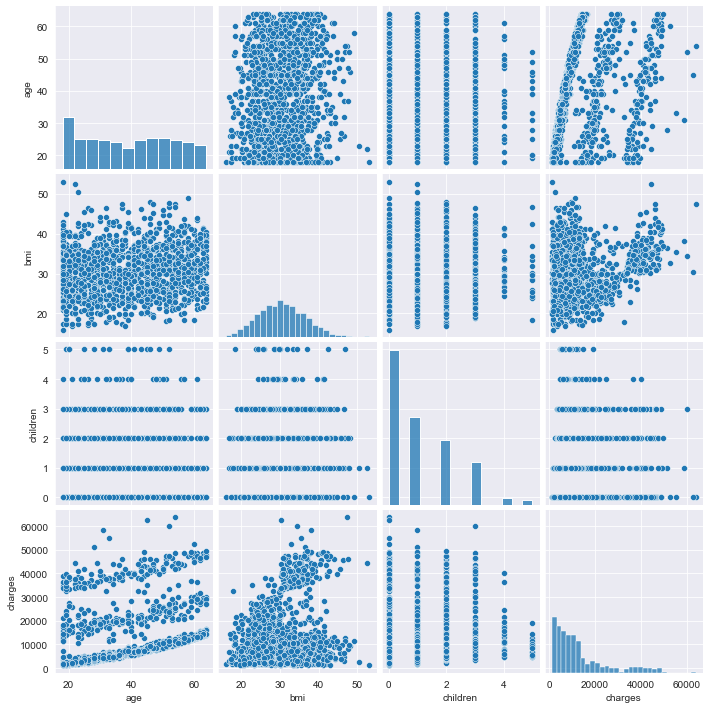

In [13]:
#relação entre as features e a variável target
#vamos analisar as dispersões das variáveis preditoras com o valor do seguro, incluindo a variavel target
#pairplot faz grafico de dispersão para os pares de variáveis
#na diagonal principal ele mostra o histograma
sns.pairplot(data=df_seguro)

Fica evidente uma correlação positiva entre idade e as cobranças de planos de saude (age X charges).
Provavelmente será uma variável importante no nosso modelo preditivo.

In [14]:
#codificação de variáveis categóricas
#modelo de machine learning não sabem o que são variaveis categoricas
#devemos portanto codificar variáveis categoricas tipo sex e localização para numero
#como temos variáveis nominais uzaremos one hot encoder
#para variáveis com duas classes como sex e smoker, podemos fazer maperamento direto

df_seguro['female'] = df_seguro['sex'].map({'female':1, 'male':0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes':1, 'no':0})

#para ver a base
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [15]:
#não vai mais precisar da coluna sex pois criou outra coluna female
#drop

df_seguro = df_seguro.drop('sex', axis=1)

df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [16]:
#para ver quantas regioes tem

df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
#para tranformar a região usar OHE 

colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)
colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [18]:
#concat, concatena pandas dataframe, axis=1 ele junta coluna, axis = 0 junta linha

pd.concat([df_seguro, colunas_regiao], axis=1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [19]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region', axis=1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


determinar as variáveis preditoras ou target
ou definindo x e y


In [20]:
x = df_seguro.drop('charges', axis=1) # tirando a variavel dependente

y = df_seguro[['charges']] # extraindo a variável dependente

In [21]:
# variável preditora ou independente ou features
x.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [22]:
# variavel dependente ou target 
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


separação da bases para não ocorrer data leakage porque vamos fazer feature scaling, por exemplo, e tais tranformações deve ser realizadas depois do split separação

In [23]:
#para ver as biblioteca sklearn vc digita from sklearn e tab

# a função que separa nossa base em treino e teste, lembrando que faremos cross validation com a base de treino

# para fazer separação de bases está dentro do modulo selection
from sklearn.model_selection import train_test_split

#devolve uma tupla com 4 elementos: x de treino, x de teste y de treino e y de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, # variavel preditora
                                                        y, # variável target
                                                        test_size=.2,
                                                       random_state=42)

# Vamos ver quantas linhas ficam com treino e teste
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

Feature Scaling
como usaremospelo menos um modelo linear, é importante realizar scaling das features para mante-las numa mesma escala de grandeza
vamos de  MinMaxScaler

In [24]:
df_seguro.describe()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [25]:
#normalização MinMaxScaler, padronização Standardscaler
from sklearn.preprocessing import MinMaxScaler

#cria scaler
scaler = MinMaxScaler()

In [26]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [27]:
scaler

MinMaxScaler()

In [28]:
colunas = x_treino.columns

#via de mão unica eu vou do treino para teste e não do teste para o treino


# parte importante - fit no treino - transform no treino e teste
x_treino[colunas] = scaler.fit_transform(x_treino)
x_teste[colunas] = scaler.transform(x_teste)

x_treino.shape, x_teste.shape

((1070, 8), (268, 8))

In [29]:
x_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [30]:
x_treino.describe() # conseguimos normalizar os dados max=1 e min=0

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [31]:
x_teste.describe() # teste 

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


Agora iremos analizar a correlação entre as variáveis

qaundo utilizamos modelos lineares é importante saber se a variável preditora guardam alguma colinearidade, se ocorrer devemos remover uma das variáveis para que o modelo não seja afetado.

<AxesSubplot:>

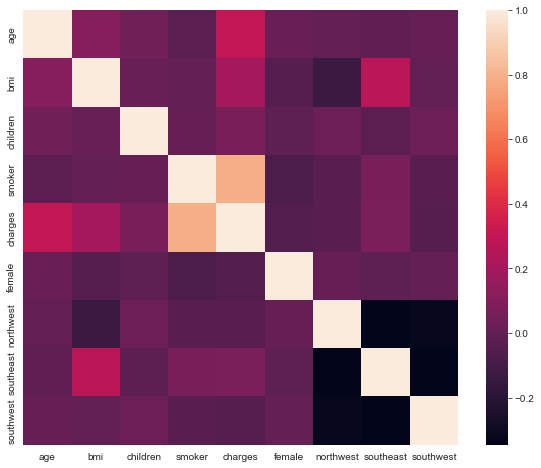

In [32]:
#grafico de correlação

figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
           square=True, ax=graficos)

In [33]:
# analisando se existe dados faltantes
df_seguro.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

Machine Learning
regreção linear - com cross validation para evitar overfit e ter uma base de comparação para outros modelos

cross validation serva para selecionar modelos e calcular uma métrica e fazer seleção de modelos

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
x_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [36]:
# Criando o estimador, algoritimo, modelo, preditor, regressor
regressao_linear = LinearRegression()


In [37]:

# Vamos treinar utilizando cross validation
valores_rmse_rl = cross_val_score (estimator=regressao_linear,
                                   X=x_treino,
                                   y=y_treino,
                                   cv=10,
                                   scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [38]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [39]:
len(valores_rmse_rl)

10

In [40]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

6133.0839262055

vamos para árvore de regressão

In [41]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

valores_rmse_arvore = cross_val_score (estimator=arvore_regressao,
                                   X=x_treino,
                                   y=y_treino,
                                   cv=10,
                                   scoring='neg_root_mean_squared_error')
valores_rmse_arvore


array([-6383.28919633, -7456.96822966, -7000.96491857, -7038.45557659,
       -7324.91985158, -6391.68689351, -7539.0995492 , -6687.24783433,
       -6669.65970226, -5760.49350526])

In [42]:
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore 

array([6383.28919633, 7456.96822966, 7000.96491857, 7038.45557659,
       7324.91985158, 6391.68689351, 7539.0995492 , 6687.24783433,
       6669.65970226, 5760.49350526])

In [43]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

6825.27852572936

Retirando as colunas de reigiões, para analise de correlação, elas não motram muita influência na variável target

In [44]:
x_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [45]:
# dos quatro modelo treinado, este teve a melhor media drop na coluna de reigao

colunas_regiao = ['northwest', 'southeast', 'southwest']

valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear,
                                            X=x_treino.drop(colunas_regiao, axis=1),
                                            y=y_treino,
                                            cv=10,
                                            scoring='neg_root_mean_squared_error')
valores_rmse_rl_sem_regiao.mean()* -1

6121.545062597132

In [46]:
#conversao
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1

In [47]:
#arvore de regressao vamos fazer a mesma coisa, utilizando cross validation
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_arvore_sem_regiao = cross_val_score(estimator = arvore_regressao,
                                               X = x_treino.drop(colunas_regiao, axis=1),
                                                y=y_treino,
                                                cv=10,
                                                scoring = 'neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao.mean() * -1

6725.460753487901

In [48]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * -1

Text(0.5, 1.0, 'comparação de RMSE')

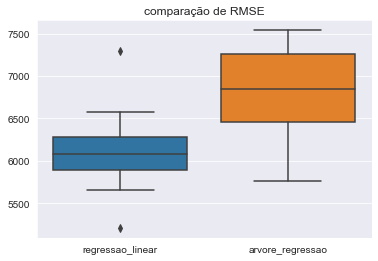

In [49]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})
#grafico
sns.boxplot(data=rmse).set_title("comparação de RMSE")

Modelo Campeão!
    com o nosso modelo campeão, vamos treinar o modelo na base de treino toda.

In [50]:
#treinar na base completa
regressao_linear. fit(x_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [51]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [52]:
#criar um data frame colocando o nome das colunas as features e os valores dos coeficiaentes

df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [53]:
!pip install statsmodels

In [54]:
#extra podemos calcular o p-valor dos coeficientes de cada regressão
#para ver se esse coeficiente é válido

import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino,x_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores



age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Analisando o P valor, chegamos a conclusão que os coeficientes para criança e sexo não são estatisticamente válidos, pois o P valor ficaram acima de 0,05. Mas idade (Age), indice de massa corporal (bmi) e fumante (smoker) está provado estatisticamente que este indice aumenta o valor do seguro de vida por ano.

Finalizando

Agora que temos nosso modelo, podemos fazer inferencia dos valores do plano de saúde no teste.


In [55]:
# ver o estimador scikit learn
# estimador é treinado com fit
# estimador prediz com predict
# este é o valor predito do moldelo campeão
precos_preditos = regressao_linear.predict(x_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [56]:
# base de teste original
len(precos_preditos)

268

In [57]:
# este é o valor real 
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [58]:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [59]:
#testar o r quadrado

from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434097

In [60]:
# testar uma predição com imputs
x_teste.drop(colunas_regiao, axis=1).columns

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [61]:
idade = input()

39


In [71]:
indice_massa_corporal = input()

35


In [63]:
criancas = input()

2


In [64]:
fumante = input('1 para fumante, 0 para não fumante')

1 para fumante, 0 para não fumante0


In [65]:
sexo = input('1 para mulher, 0 para homem')

1 para mulher, 0 para homem0


In [66]:
idade, indice_massa_corporal, criancas, fumante, sexo

('39', '35', '2', '0', '0')

In [72]:
#realizando scaling das features
# scaler_sem_regiao = MinMaxScaler()
# scaler_sem_regiao.fit(x_treino.drop(colunas_regiao, axis = 1))

#completamos com 1,1,1 o x_treino porque o original tinha colunas de regiao
features = [(idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1)]

# o scaler é do treino 
features = scaler.transform(features)
features

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.45652174, 0.51224105, 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [68]:
features

array([[0.45652174, 0.51224105, 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [69]:
# somente as 5 features
features = features[:,:-3]
features

array([[0.45652174, 0.51224105, 0.4       , 0.        , 0.        ]])

In [70]:
# resultado da predição
regressao_linear.predict(features)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10222.46832435]])